Finished
      head_ref_python  vel_ref_python
0           -0.404892        2.658002
1           -0.404892        2.658003
2           -0.404892        2.658012
3           -0.404892        2.658050
4           -0.404891        2.658150
...               ...             ...
4996         2.963496        0.000000
4997         2.963495        0.000000
4998         2.963495        0.000000
4999         2.963494        0.000000
5000         2.963493        0.000000

[5001 rows x 2 columns]
      head_ref   vel_ref
0    -0.404892  2.658002
1    -0.404892  2.658003
2    -0.404892  2.658012
3    -0.404892  2.658050
4    -0.404891  2.658150
...        ...       ...
4996  2.963496  0.000000
4997  2.963495  0.000000
4998  2.963495  0.000000
4999  2.963494  0.000000
5000  2.963493  0.000000

[5001 rows x 2 columns]
Plot


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

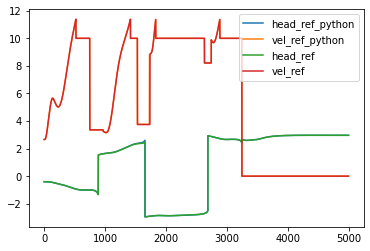

In [1]:
#!/usr/bin/env python3

import waypoint_algorithm as wpa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

waypoints = np.array([  [70, -30, 10, 5],
                        [71, 30, 10, 5],
                        [-100, -5, 10, 5],
                        [-200, 20, 10 ,5]])
parameters = np.array([3, 1, 1.5, 45])
df_matlab = pd.read_csv('C:/Users/lgnds/Documents/GitHub/WaveRunner-Controller/colcon_ws/src/waverunner_scenarios/library/wp_gen.csv')

wp_gen = wpa.waypoint_algorithm(waypoints,parameters)

vel_ref_out = []
head_ref_out = []

for x,y,psi in zip(df_matlab.eta_x, df_matlab.eta_y, df_matlab.eta_psi):
    wp_gen.update(np.array([x,y,psi]))
    vel_ref_out.append(wp_gen.vel_ref)
    head_ref_out.append(wp_gen.head_ref)

print('Finished')

df_ver = df_matlab[['head_ref', 'vel_ref']]

df_out = pd.DataFrame(list(zip(head_ref_out,vel_ref_out)),columns=['head_ref_python','vel_ref_python'])

#df_ver['head_ref_python'] = head_ref_out
#df_ver['vel_ref_python'] = vel_ref_out
print(df_out)
print(df_ver)

print('Plot')
plt.close("all")
plt.figure()
ax = df_out.plot()
df_ver.plot(ax=ax)


Finished
       head_ref_python  vel_ref_python  wp_vel_ref_out
0            -2.780071             7.0             7.0
1            -2.780287             7.0             7.0
2            -2.780505             7.0             7.0
3            -2.780729             7.0             7.0
4            -2.780983             7.0             7.0
...                ...             ...             ...
10338         1.397978             0.0             6.0
10339         1.392775             0.0             6.0
10340         1.385887             0.0             6.0
10341         1.378962             0.0             6.0
10342         1.372982             0.0             6.0

[10343 rows x 3 columns]
Plot


<Figure size 432x288 with 0 Axes>

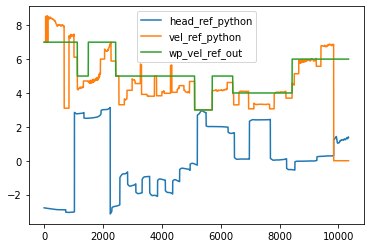

In [14]:
#!/usr/bin/env python3

import waypoint_algorithm as wpa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

waypoints = pd.read_csv('C:/Users/Viktor/Documents/GitHub/WaveRunner-Controller/colcon_ws/src/waverunner_scenarios/library/waypoints.csv')
waypoints_np = waypoints.to_numpy()
parameters = np.array([3, 1, 1.5, 45])
eta_mat = pd.read_csv('C:/Users/Viktor/Documents/GitHub/WaveRunner-Controller/colcon_ws/src/waverunner_scenarios/library/eta.csv')


wp_gen = wpa.Waypoint_Algorithm(waypoints_np,parameters)

vel_ref_out = []
head_ref_out = []
wp_vel_ref_out = []

for x,y,psi in zip(eta_mat.eta_y, eta_mat.eta_x, eta_mat.eta_psi):
    wp_gen.update(np.array([x,y,psi]))
    vel_ref_out.append(wp_gen.vel_ref)
    wp_vel_ref_out.append(wp_gen.wp_vel_seg)
    head_ref_out.append(wp_gen.head_ref)


print('Finished')

#df_ver = eta_mat[['head_ref', 'vel_ref']]

df_out = pd.DataFrame(list(zip(head_ref_out,vel_ref_out,wp_vel_ref_out)),columns=['head_ref_python','vel_ref_python','wp_vel_ref_out'])

#df_ver['head_ref_python'] = head_ref_out
#df_ver['vel_ref_python'] = vel_ref_out
print(df_out)
#print(df_ver)

print('Plot')
plt.close("all")
plt.figure()
ax = df_out.plot()
#df_ver.plot(ax=ax)